<a href="https://colab.research.google.com/github/Amir-mjafari/time_serries_analysis/blob/main/SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf

import statsmodels.api as sm

from itertools import repeat
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Reading the data

df = pd.read_csv('/content/data_hourly.csv')
print(df)

        od_id        date  hour  travel_speeds        day
0           1  2018-10-01     0      18.373104     Monday
1           2  2018-10-01     0      18.300609     Monday
2           3  2018-10-01     0      18.130586     Monday
3           4  2018-10-01     0      18.435062     Monday
4           5  2018-10-01     0      18.059232     Monday
...       ...         ...   ...            ...        ...
125393    178  2018-10-31    23      15.824671  Wednesday
125394    179  2018-10-31    23      12.989511  Wednesday
125395    180  2018-10-31    23      23.316110  Wednesday
125396    181  2018-10-31    23      15.880096  Wednesday
125397    182  2018-10-31    23      16.072447  Wednesday

[125398 rows x 5 columns]


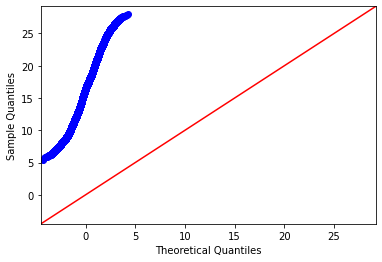

In [ ]:
# is whole of the data is normally distrubuted?

## NO!

## Who cares? It is not an assumption for SARIMA to be the data normally dist.!


fig = sm.qqplot(df["travel_speeds"], line='45')
plt.show()

In [ ]:
# Selecting the OD ID

route = 1

df = df[df.od_id == route]
print(df)

        od_id        date  hour  travel_speeds        day
0           1  2018-10-01     0      18.373104     Monday
182         1  2018-10-02     0      18.883842    Tuesday
364         1  2018-10-03     0      18.155032  Wednesday
546         1  2018-10-04     0      18.154072   Thursday
728         1  2018-10-05     0      18.579987     Friday
...       ...         ...   ...            ...        ...
124488      1  2018-10-27    23      17.817529   Saturday
124670      1  2018-10-28    23      17.234151     Sunday
124852      1  2018-10-29    23      18.153492     Monday
125034      1  2018-10-30    23      18.107843    Tuesday
125216      1  2018-10-31    23      17.977336  Wednesday

[689 rows x 5 columns]


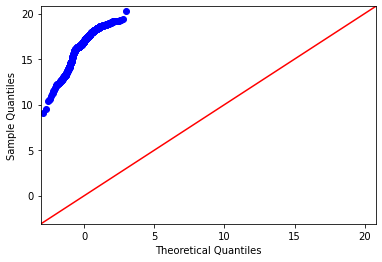

In [ ]:
# is the OD ID 1 travel speeds is normally distrubuted?

## NO!

## Again! not an assumption for SARIMA!

fig = sm.qqplot(df["travel_speeds"], line='45')
plt.show()

In [ ]:
# Concatenating time and date to create a time stamp

df['hour'] = pd.to_datetime(df['hour'], format='%H').dt.time.astype(str)
df["timestamp"] = pd.to_datetime(df['date'] + ' ' + df['hour'])
df = df.drop(columns=['date', 'hour','day','od_id'])
df = df.sort_values(['timestamp'])
df = df.set_index("timestamp")

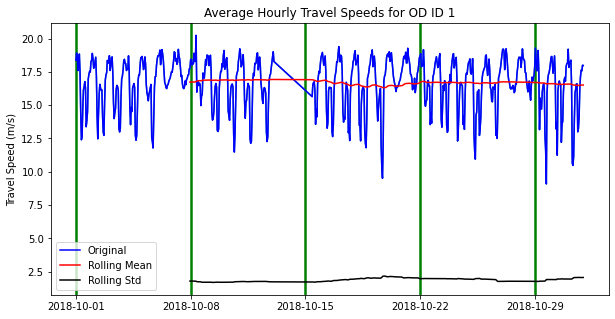

In [ ]:
# Time serries plot

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO))
plt.grid(axis = 'x', linewidth = 2.5, color = 'green')

plt.ylabel("Travel Speed (m/s)")
plt.title('Average Hourly Travel Speeds for OD ID 1')
rolmean = df.rolling(window=168, closed= "both").mean()
rolstd = df.rolling(window=168).std()
plt.plot(df, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.show(block=False)

####Cyclical fluctuations, which correspond to periodical but not seasonal variations###

###You cannot use categorical predictors for nonlinear regression. A categorical predictor is one that takes values from a fixed set of possibilities###

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


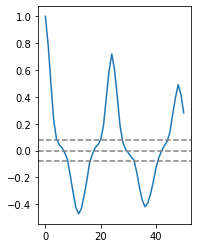

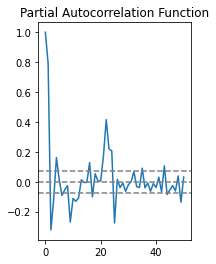

<Figure size 432x288 with 0 Axes>

In [ ]:
# ACF and PACF

lag_pacf = pacf(df, nlags=20, method='ols')

lag_acf = acf(df, nlags=50)
lag_pacf = pacf(df, nlags=50, method='ols')

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.show()
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()
plt.tight_layout()

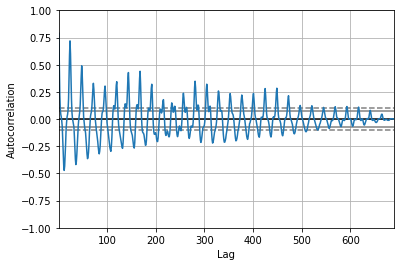

In [ ]:
# ACF for all the time steps

autocorrelation_plot(df)
plt.show()

In [ ]:
display(df)

# x = pd.date_range(start='1970-01-01', freq='D', periods=3)
# print(x)

,travel_speeds
timestamp,
2018-10-01 00:00:00,18.373104
2018-10-01 01:00:00,18.915086
2018-10-01 02:00:00,18.599084
2018-10-01 03:00:00,17.600573
2018-10-01 04:00:00,18.098227
...,...
2018-10-31 19:00:00,17.143671
2018-10-31 20:00:00,17.625282
2018-10-31 21:00:00,17.570588


In [ ]:
# ADF test for <Log> of the data

dftest = adfuller(np.log(df['travel_speeds']), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                  -5.500758
p-value                          0.000002
#Lags Used                      20.000000
Number of Observations Used    668.000000
Critical Value (1%)             -3.440177
Critical Value (5%)             -2.865876
Critical Value (10%)            -2.569079
dtype: float64


In [ ]:
# ADF test for the data

dftest = adfuller(df['travel_speeds'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                  -5.317455
p-value                          0.000005
#Lags Used                      20.000000
Number of Observations Used    668.000000
Critical Value (1%)             -3.440177
Critical Value (5%)             -2.865876
Critical Value (10%)            -2.569079
dtype: float64


In [ ]:
# Filling the gap with NaN values

## IT IS IMPORTANT FOR SEASONAL ADJUSTING, because it would be problematic without filling the gap##
df_fill = df.asfreq("1H")
print(len(df_fill))


744


In [ ]:
# SARIMA Model tuning and fitting

# NOTE: Seasonal is 168 hours OR 1 week

# MODEL CONFIGURATIONS:
## my_order = (2, 0, 0)
## my_seasonal_order = (1, 1, 0, 168)

# Create Training and Test
train = df_fill[:504]
test = df_fill[504:]

# Build Model
 
my_order = (1, 0, 0)
my_seasonal_order = (1, 1, 0, 168)
model = sm.tsa.statespace.SARIMAX(train, order=my_order, seasonal_order=my_seasonal_order, freq=train.index.inferred_freq)  
fitted = model.fit(disp=-1)  

# Forecast

# WHY 240?  744-504 = 240 (number of gap-filled data - number of training = number of prediction)
fc = fitted.forecast(240)  #forecast for the next 240 hours

# Make as pandas series
fc_series = pd.Series(fc.values, index=test.index)




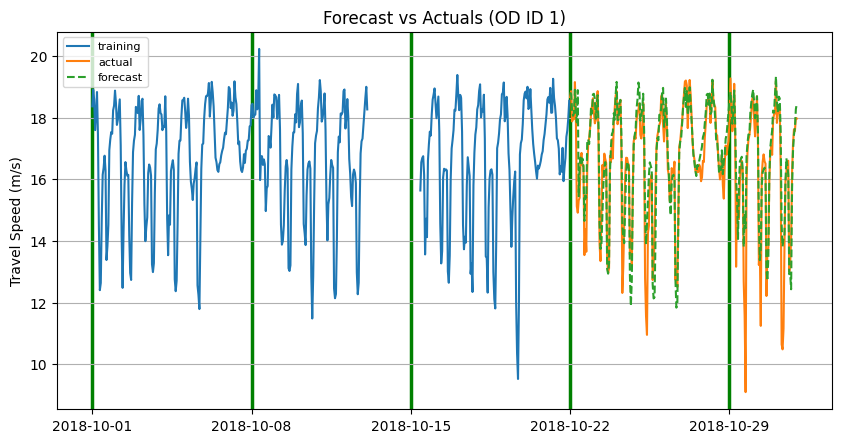

In [ ]:
# Plot the Forecast VS Actual

fig, ax = plt.subplots(figsize=(10,5), dpi=100)


plt.grid(axis = 'x', linewidth = 2.5, color = 'green')
ax.plot(train, label='training')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO))
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast',linestyle='--')
plt.title('Forecast vs Actuals (OD ID 1)')
plt.ylabel("Travel Speed (m/s)")
plt.grid(axis = 'y')
plt.legend(loc='upper left', fontsize=8)
plt.show(block=False)

In [ ]:
print(fitted.summary())

                                  Statespace Model Results                                 
Dep. Variable:                       travel_speeds   No. Observations:                  504
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 168)   Log Likelihood                -257.625
Date:                             Sun, 15 May 2022   AIC                            521.250
Time:                                     07:27:41   BIC                            532.702
Sample:                                 10-01-2018   HQIC                           525.815
                                      - 10-21-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5481      0.030     18.089      0.000       0.489       0.608
ar.S.L168     -0.7733      

In [ ]:
fc

2018-10-22 00:00:00    18.828023
2018-10-22 01:00:00    18.768784
2018-10-22 02:00:00    18.242771
2018-10-22 03:00:00    18.066207
2018-10-22 04:00:00    18.148142
                         ...    
2018-10-31 19:00:00    16.921390
2018-10-31 20:00:00    17.448268
2018-10-31 21:00:00    17.671574
2018-10-31 22:00:00    18.280838
2018-10-31 23:00:00    18.456759
Freq: H, Length: 240, dtype: float64

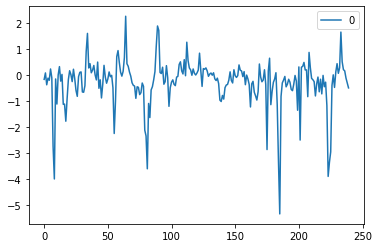

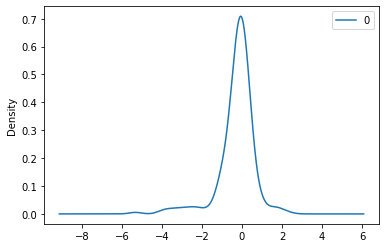

                0
count  240.000000
mean    -0.261846
std      0.905095
min     -5.326527
25%     -0.436716
50%     -0.132318
75%      0.173772
max      2.276755


In [ ]:
# DIstribution of Residuals

#NOTE: IT IS ONLY for the forecast part!


test_residuals = np.array(test["travel_speeds"].tolist()) - np.array(fc.values.tolist())
residuals = pd.DataFrame(test_residuals)

residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
# Calculating MSE 
##NOTE: It is only for the prediction part

mse = np.mean((test_residuals)**2)
mse

0.8843474146536735

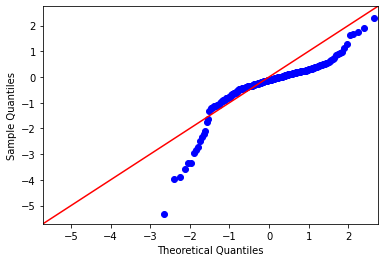

In [ ]:
# Checking the normality of SARIMA model residuals for the only forecast and test part
# RESIDUALS = TEST - FORECAST

# NO it is not Normally Dist.!

# Who cares? it is not an assumption for SARIMA
## It uses Maximum Likelihood so it can handle non normally dist. residuals

fig = sm.qqplot(test_residuals, line='45')
plt.show()


# Consideration

I also tried with Log of data but no much change. In my Analysis the best way to make the serries more stationary was differencing by 1.

# Time dependencies
Due to the limit of the run time, I could not model with longer time dependencies
